In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [4]:
## Uncomment these two lines once on each computer. 
#!pip install Thermobar
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/0.02.zip"
import Thermobar as pt

In [5]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

##  Loading Keith's calibration dataset and calculating missing data amount

In [6]:
Keith=pd.read_excel('Supporting_Data_1.xlsx', sheet_name='Putirka_Cali')

In [7]:
## Loading into thermobar format
Keith_in=pt.import_excel('Supporting_Data_1.xlsx', sheet_name='Putirka_Cali_Thermobar') 
Keith_Cpx=Keith_in['Cpxs']
cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Keith_Cpx)

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [12]:
NoCr_Liq=Keith['Wt: Cr2O3_Liq']==0
sum(NoCr_Liq)

705

In [13]:
NoCr_Cpx=Keith['Wt: Cr2O3_Cpx']==0
sum(NoCr_Cpx)

513

In [14]:
Cr_Liq=Keith['Wt: Cr2O3_Liq']>0
sum(Cr_Liq)

506

In [15]:
Cr_Cpx=Keith['Wt: Cr2O3_Cpx']>0
sum(Cr_Cpx)

698

In [16]:
print('Prop with no Liq Cr data')
print(100*sum(NoCr_Liq)/(sum(NoCr_Liq)+sum(Cr_Liq)))


Prop with no Liq Cr data
58.21635012386457


In [17]:
print('Prop with no Cpx Cr data')
print(100*sum(NoCr_Cpx)/(sum(NoCr_Cpx)+sum(Cr_Cpx)))


Prop with no Cpx Cr data
42.36168455821635


In [18]:
print('Prop with water = 0')
print(100*sum(Keith['Wt: H2O']==0)/(sum(Keith['Wt: H2O']>0)+sum(Keith['Wt: H2O']==0)))
print(100*sum(Keith['Wt: H2O']==0)/(len(Keith)))

Prop with water = 0
73.50565428109854
72.27958697378872


In [19]:
print('Prop with P2O5 = 0')
print(100*sum(Keith['Wt: P2O5_Liq']==0)/(sum(Keith['Wt: P2O5_Liq']>0)+sum(Keith['Wt: P2O5_Liq']==0)))
print(100*sum(Keith['Wt: P2O5_Liq']==0)/(len(Keith)))

Prop with P2O5 = 0
56.06936416184971
53.93169181890389


## Loading my newly compiled experimental dataset and finding missing data amount

In [20]:
out=pt.import_excel('Supporting_Data_1.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<15
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=((eq_tests['Delta_EnFs_Mollo13']<0.05*sigma)
        &(eq_tests['Delta_Kd_Put2008']<0.08))
Cpx_Glass_Filt=Cpx_Glass.loc[Press_new]
xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]


Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\AppData\Local\Temp\ipykernel_28456\3784342713.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [21]:
NoCr_Cpx_New=Cpx_Glass_Filt['Cr2O3_Cpx']==0
Cr_Cpx_New=Cpx_Glass_Filt['Cr2O3_Cpx']>0

100*sum(NoCr_Cpx_New)/(sum(Cr_Cpx_New)+sum(NoCr_Cpx_New))

59.13978494623656

In [22]:
NoCr_Liq_New=Cpx_Glass_Filt['Cr2O3_Liq']==0
Cr_Liq_New=Cpx_Glass_Filt['Cr2O3_Liq']>0

100*sum(NoCr_Liq_New)/(sum(Cr_Liq_New)+sum(NoCr_Liq_New))

89.03225806451613

## What ones don't report Cr

In [23]:
# Hamada, all zeros- Use synthetic starting mateiral, dont seem to add any Cr
# Erdmann, al zeros - Natural starting material, but don't report Cr for it. 
# Berndt all zeros - Natural and synthetic starting materials - No mention of Cr. 
# Mandler all zeros - Starting material, mafic pumice, has <5 ppm Cr basd on whole-rock. but with Kd of 10-50, could
# be 250 ppm of Cr = 0.025
# Nandekar all zeros - synthetic apparent near-primary ol-tholeiite (10 wt% MgO), 
#but add no Cr even though it seems in nature there would be Cr
# Blatter, does have most
# Melekhova does have most
# Ulmer, does have most
# Almeev, has none - Synthetic starting material, with no Cr. 
# Andujar has none - Use natural Balos Basalt , can't find Cr data for it. 
# cadoux has none - Natural high Si samples. 
# Parat has none - mafic and crystal-poor Arenal-type basalt -187 ppm Cr. 
#Using a Kd of 30, means 0.5 wt% Cr expected

# Sisson does have most
# Koepke2018 has none - synthetic starting material, no Cr. 
# Husen has most
# Erdman has none - basaltic andesite stage 4 dome clasts, no mention of Cr. 
Cpx_Glass['Citation_x'].loc[(Cpx_Glass['Cr2O3_Cpx']==0) & (Press_new)].unique()

array(['Hamada2008_notinLEPR', 'Erdmann2016_notinLEPR',
       'Berndt2005_notinLEPR', 'Mandler2013_notinLEPR',
       'Nandekar2014_notinLEPR', 'Blatter2013_notinLEPR',
       'Melekhova2015_notinLEPR', 'Ulmer2018_notinLEPR',
       'Almeev2013_notinLEPR', 'Andujar2015_notinLEPR',
       'Cadoux2014_notinLEPR', 'Parat2014_notinLEPR',
       'Sisson2005_notinLEPR', 'Koepke2018_notinLEPR',
       'Husen2016_notinLEPR', 'Erdman_Koepke2016_notinLEPR'], dtype=object)

In [24]:
# Getting values to loop over, this is using all of them, but you could do a subset for a larger dataset. 
index2=Cpx_Glass.index.values
sam=np.ndarray.tolist(index2)

In [25]:
len(sam)

852

In [26]:
Cpx_Glass['Citation_x'].unique()

array(['Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8',
       'Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225',
       'Sisson, T.W., Grove, T.L. (1993) Temperatures and H2O contents of low-MgO high-alumina basalts. Contributions to Mineralogy and Petrology 113 167-184. 10.1007/bf00283226',
       'Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Baker, R.B., and Eggler, D.H. (1987) Compositions of anhydrous and hydrous melts coexisting with pla

In [27]:
Cpx_Glass_Cr=Cpx_Glass.loc[Cpx_Glass['Cr2O3_Cpx']>0]

## Step 1 - Calculate P and T for measured Cr content for Cpx-Liq

In [42]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    # Cpx-Liq using measured Cr Contents.   

    #Eq 31-33 
    Eq3133M=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                     cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq31", equationT="T_Put2008_eq33",
                                         )
    Cr_31_T33_P_Meas=Eq3133M.P_kbar_calc
    Cr_31_T33_T_Meas=Eq3133M.T_K_calc


    # 32c 33


    Eq32c33M=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                      cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq32c", equationT="T_Put2008_eq33")


    Cr_32c_T33_P_Meas=Eq32c33M.P_kbar_calc
    Cr_32c_T33_T_Meas=Eq32c33M.T_K_calc


    # Neave and eq 33

    NT33M=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Neave2017", equationT="T_Put2008_eq33")
    Cr_Neave_T33_P_Meas=NT33M.P_kbar_calc
    Cr_Neave_T33_T_Meas=NT33M.T_K_calc


    # 32c 1996

    Eq32c1996M=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                      cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq32c", equationT="T_Put1996_eqT1")


    Cr_32c_1996_T_Meas=Eq32c1996M.T_K_calc
    Cr_32c_1996_P_Meas=Eq32c1996M.P_kbar_calc



    # Petrelli
    Cr_Pet_T_Meas=pt.calculate_cpx_liq_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationT="T_Petrelli2020_Cpx_Liq").T_K_calc

    Cr_Pet_P_Meas=pt.calculate_cpx_liq_press(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs1.loc[sam].reset_index(drop=True), 
                                          equationP="P_Petrelli2020_Cpx_Liq").P_kbar_calc 


Youve selected a P-independent function


## Same calculations with Cr=0

In [43]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    
    myCpxs2=myCpxs1.copy()
    myCpxs2['Cr2O3_Cpx']=0




    # Cpx-Liq using Cr=0 

    #Eq 31-33 
    Eq3133Z=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                     cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq31", equationT="T_Put2008_eq33",
                                         )
    Cr_31_T33_P_NoCr=Eq3133Z.P_kbar_calc
    Cr_31_T33_T_NoCr=Eq3133Z.T_K_calc


    # 32c 33


    Eq32c33Z=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                      cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq32c", equationT="T_Put2008_eq33")


    Cr_32c_T33_P_NoCr=Eq32c33Z.P_kbar_calc
    Cr_32c_T33_T_NoCr=Eq32c33Z.T_K_calc


    # Neave and eq 33

    NT33Z=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Neave2017", equationT="T_Put2008_eq33")
    Cr_Neave_T33_P_NoCr=NT33Z.P_kbar_calc
    Cr_Neave_T33_T_NoCr=NT33Z.T_K_calc


    # 32c 1996

    Eq32c1996Z=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                      cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Put2008_eq32c", equationT="T_Put1996_eqT1")


    Cr_32c_1996_T_NoCr=Eq32c1996Z.T_K_calc
    Cr_32c_1996_P_NoCr=Eq32c1996Z.P_kbar_calc



    # Petrelli
    Cr_Pet_T_NoCr=pt.calculate_cpx_liq_temp(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationT="T_Petrelli2020_Cpx_Liq").T_K_calc

    Cr_Pet_P_NoCr=pt.calculate_cpx_liq_press(liq_comps=myLiquids1.loc[sam].reset_index(drop=True), 
                                                        cpx_comps=myCpxs2.loc[sam].reset_index(drop=True), 
                                          equationP="P_Petrelli2020_Cpx_Liq").P_kbar_calc 


Youve selected a P-independent function


## Cpx-only calculations no Cr. 

In [44]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    # Cpx-only pressure calculations with Cr=0 (Cpxs2)
    Cr_cpx_comp_Wang21_NoCr=pt.calculate_cpx_only_press(cpx_comps=myCpxs2.loc[sam],
                            equationP="P_Wang2021_eq1")

    Cr_cpx_comp_Pet_NoCr=pt.calculate_cpx_only_press(cpx_comps=myCpxs2.loc[sam], 
                                    equationP="P_Petrelli2020_Cpx_only").P_kbar_calc

    Cr_cpx_comp_Put2008_NoCr=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs2.loc[sam],
                                        equationP="P_Put2008_eq32b",
                                        equationT="T_Put2008_eq32d").P_kbar_calc




    # Cpx-only temperature calculations with Cr=0 (Cpxs2)
    Cr_cpx_comp_Wang21_T_NoCr=pt.calculate_cpx_only_temp(cpx_comps=myCpxs2.loc[sam], 
                                                          equationT="T_Wang2021_eq2")

    Cr_cpx_comp_Pet_T_NoCr=pt.calculate_cpx_only_temp(cpx_comps=myCpxs2.loc[sam], 
                                    equationT="T_Petrelli2020_Cpx_only").T_K_calc

    Cr_cpx_comp_Put2008_T_NoCr=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs2.loc[sam],
                                            equationP="P_Put2008_eq32b",
                                            equationT="T_Put2008_eq32d").T_K_calc

    # Cpx-only pressure calculations with Cr=meas (Cpxs1)

    Cr_cpx_comp_Wang21_Meas=pt.calculate_cpx_only_press(cpx_comps=myCpxs1.loc[sam], 
                                                        equationP="P_Wang2021_eq1")

    Cr_cpx_comp_Pet_Meas=pt.calculate_cpx_only_press(cpx_comps=myCpxs1.loc[sam], 
                                       equationP="P_Petrelli2020_Cpx_only").P_kbar_calc

    Cr_cpx_comp_Put2008_Meas=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs1.loc[sam],
                                                          equationP="P_Put2008_eq32b",
                                 equationT="T_Put2008_eq32d").P_kbar_calc


    # Cpx-only temperature calculations with Cr=meas (Cpxs1)

    Cr_cpx_comp_Wang21_T_Meas=pt.calculate_cpx_only_temp(cpx_comps=myCpxs1.loc[sam], 
                                                          equationT="T_Wang2021_eq2")
    Cr_cpx_comp_Pet_T_Meas=pt.calculate_cpx_only_temp(cpx_comps=myCpxs1.loc[sam], 
                                                         equationT="T_Petrelli2020_Cpx_only").T_K_calc

    Cr_cpx_comp_Put2008_T_Meas=pt.calculate_cpx_only_press_temp(cpx_comps=myCpxs1.loc[sam],
                                                                equationP="P_Put2008_eq32b",
                                                                 equationT="T_Put2008_eq32d").T_K_calc


## What do cation sums do     myCpxs2=myCpxs1.copy()
    myCpxs2['Cr2O3_Cpx']=0

In [45]:
cat_sums_original=pt.calculate_clinopyroxene_components(cpx_comps=myCpxs1)
myCpxs2=myCpxs1.copy()
myCpxs2['Cr2O3_Cpx']=0
cat_sums_noCr=pt.calculate_clinopyroxene_components(cpx_comps=myCpxs2)    

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [46]:
Cpx_with_Cr=cat_sums_original.loc[myCpxs1['Cr2O3_Cpx']>0]
Cpx_with_noCr=cat_sums_original.loc[myCpxs1['Cr2O3_Cpx']==0]


In [47]:
Cpx_with_noCr

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21
0,46.900002,1.07,9.14,10.700000,0.30,10.00,20.299999,0.59,0.02,0.0,0,1.780864,0.566065,0.339780,0.825899,0.409036,0.043437,0.000969,0.009649,0.030561,0.0,0.0,0.219136,0.189900,0.326876,0.196207,0.476918,4.006260,0.476918,0.011550,0.328230,0.033994,0.0,0.100291,0.624895,0.043437,0,0.146463,0.036336,0.643100,0.131373,0.643100,0.397640,0.011550,0.328230
1,48.099998,0.85,8.32,12.300000,0.29,10.50,18.500000,0.71,0.01,0.0,1,1.816364,0.591093,0.388435,0.748519,0.370287,0.051983,0.000482,0.009276,0.024144,0.0,0.0,0.183636,0.186650,0.342058,0.224783,0.433159,4.000582,0.433159,0.000681,0.387754,0.001754,0.0,0.156949,0.603438,0.051983,0,0.134667,0.024485,0.589367,0.195081,0.589367,0.352315,0.000681,0.387754
2,48.299999,0.71,7.80,11.200000,0.40,12.20,19.200001,0.60,0.04,0.0,2,1.805281,0.679776,0.350084,0.768904,0.343597,0.043481,0.001907,0.012663,0.019961,0.0,0.0,0.194719,0.148878,0.377913,0.194625,0.427462,4.025654,0.427462,0.049400,0.300684,0.141109,0.0,0.149589,0.660059,0.043481,0,0.105397,0.044661,0.618846,0.205507,0.618846,0.403518,0.049400,0.300684
3,48.799999,0.64,6.53,16.200001,0.50,10.10,16.400000,0.64,0.07,0.0,3,1.860560,0.574056,0.516529,0.669948,0.293423,0.047310,0.003405,0.016147,0.018354,0.0,0.0,0.139440,0.153983,0.326069,0.293394,0.380537,3.999731,0.380537,0.000000,0.516529,0.000000,0.0,0.231272,0.526366,0.047310,0,0.106674,0.016383,0.546891,0.271847,0.546891,0.283669,-0.003942,0.520472
47,51.750000,0.26,2.43,6.050000,0.17,16.51,21.330000,0.33,0.00,0.0,47,1.926453,0.916228,0.188347,0.850770,0.106613,0.023818,0.000000,0.005360,0.007280,0.0,0.0,0.073547,0.033066,0.468576,0.096324,0.435099,4.024870,0.435099,0.049739,0.138608,0.264082,0.0,0.117233,0.829480,0.023818,0,0.009248,0.032150,0.809372,0.147602,0.809372,0.668119,0.049739,0.138608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,51.150000,0.71,3.40,8.950000,0.44,12.52,21.960000,0.62,0.06,0.0,836,1.917297,0.699611,0.280558,0.881961,0.150203,0.045059,0.002869,0.013970,0.020019,0.0,0.0,0.082703,0.067501,0.375705,0.150665,0.473630,4.011547,0.473630,0.020224,0.260334,0.072086,0.0,0.063165,0.713759,0.045059,0,0.022441,0.030131,0.829389,0.075390,0.829389,0.583671,0.020224,0.260334
837,53.080000,0.49,2.50,11.870000,0.68,12.27,18.290000,0.73,0.08,0.0,837,1.984710,0.683942,0.371170,0.732745,0.110170,0.052922,0.003816,0.021536,0.013781,0.0,0.0,0.015290,0.094880,0.382548,0.207606,0.409845,3.974793,0.409845,0.000000,0.371170,0.000000,0.0,0.192948,0.648210,0.052922,0,0.041958,0.000000,0.690787,0.182162,0.690787,0.438824,-0.054231,0.425401
838,51.920000,0.58,2.32,11.420000,0.68,13.35,18.630000,0.67,0.09,0.0,838,1.952979,0.748605,0.359240,0.750843,0.102851,0.048864,0.004319,0.021665,0.016410,0.0,0.0,0.047021,0.055830,0.402760,0.193276,0.403964,4.005776,0.403964,0.007233,0.352007,0.020135,0.0,0.180686,0.675723,0.048864,0,0.006967,0.020027,0.723849,0.191998,0.723849,0.479745,0.007233,0.352007
839,51.390000,0.41,1.67,12.590000,0.76,13.35,17.910000,0.57,0.02,0.0,839,1.961719,0.759710,0.401920,0.732533,0.075133,0.042187,0.000974,0.024573,0.011773,0.0,0.0,0.038281,0.036852,0.401080,0.212189,0.386731,4.010522,0.386731,0.020070,0.381850,0.049936,0.0,0.211039,0.653996,0.036852,1,0.000000,0.019140,0.713392,0.224119,0.713392,0.456896,0.020070,0.381850


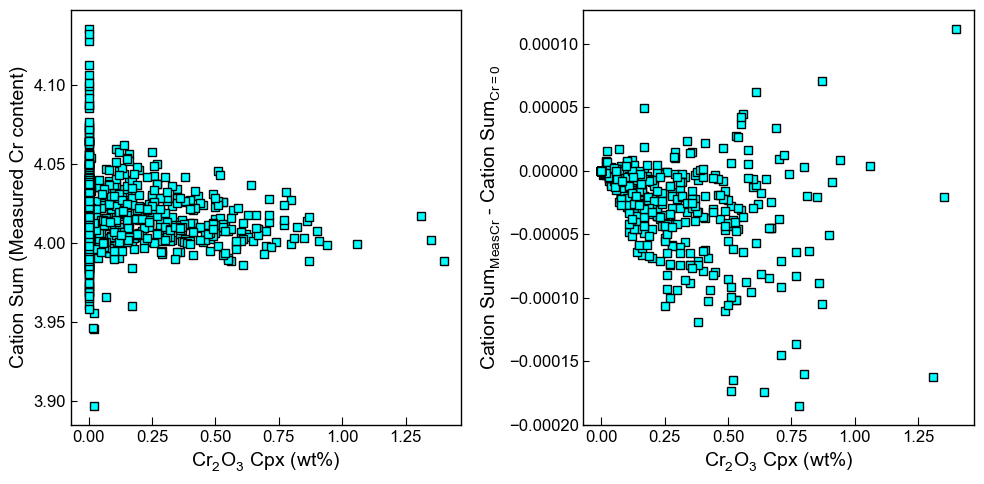

In [48]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(cat_sums_original['Cr2O3_Cpx'],
         cat_sums_original['Cation_Sum_Cpx']-cat_sums_noCr['Cation_Sum_Cpx'], 
         'sk', mfc='cyan')
#ax2.hist(Cpx_with_Cr['Cation_Sum_Cpx'], fc='cyan')
#ax2.hist(Cpx_with_noCr['Cation_Sum_Cpx'], facecolor='None', ec='k')

NoCr=np.sort(Cpx_with_noCr['Cation_Sum_Cpx'])
HasCr=np.sort(Cpx_with_Cr['Cation_Sum_Cpx'])
b=3
# ax2.step(np.concatenate([NoCr, NoCr[[-1]]]),
#          np.arange(NoCr.size+1)/NoCr.size, color='black', linewidth=b, label='NoCr')
# ax2.step(np.concatenate([HasCr, HasCr[[-1]]]),
#          np.arange(HasCr.size+1)/HasCr.size, color='orange', linewidth=b, label='HasCr')
# ax2.legend()
# ax2.plot([3.98, 3.98], [0, 1], '-r')
# ax2.plot([4.02, 4.02], [0, 1], '-r')
ax2.plot(cat_sums_original['Cr2O3_Cpx'],
         cat_sums_original['Cation_Sum_Cpx'], 
         'sk', mfc='cyan')
ax1.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax2.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax1.set_ylabel('Cation Sum$_{Meas Cr}$ - Cation Sum$_{Cr=0}$')
ax2.set_ylabel('Cation Sum (Measured Cr content)')
fig.tight_layout()
fig.savefig('Cr_cation_sums.png', dpi=200)

## Lets show this with a foreloop - obviously complex

In [49]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    linCr=np.linspace(0, 1, 10)
    example_cpx1=myCpxs1.iloc[0:10]
    example_cpx2=myCpxs1.iloc[0:10]
    example_cpx1_cs=np.empty([10, len(linCr)], dtype=float)
    example_cpx2_cs=np.empty([10, len(linCr)], dtype=float)
    for i in range(0, len(linCr)):
        example_cpx1['Cr2O3_Cpx']=linCr[i]
        example_cpx2['Na2O_Cpx']=linCr[i]
        example_cpx1_cs[:, i]=pt.calculate_clinopyroxene_components(cpx_comps=example_cpx1).Cation_Sum_Cpx
        example_cpx2_cs[:, i]=pt.calculate_clinopyroxene_components(cpx_comps=example_cpx2).Cation_Sum_Cpx
    

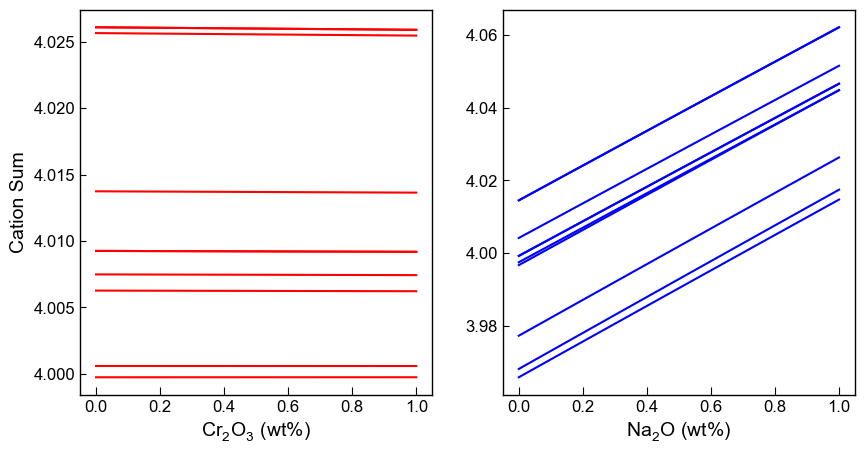

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for i in range(0, 10):
    ax1.plot(linCr, example_cpx1_cs[i, :], '-r')
    ax2.plot(linCr, example_cpx2_cs[i, :], '-b')
ax1.set_xlabel('Cr$_2$O$_3$ (wt%)')
ax2.set_xlabel('Na$_2$O (wt%)')
ax1.set_ylabel('Cation Sum')
ax1.ticklabel_format(useOffset=False)
fig.savefig('Cation_Sum_pertubation.png', dpi=200)

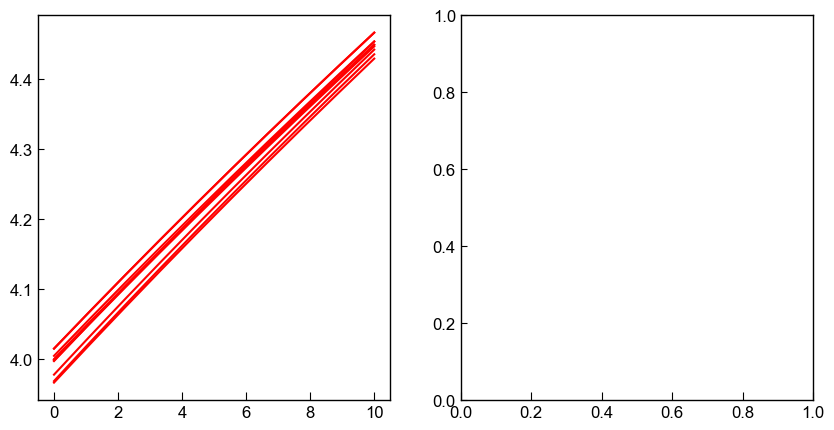

In [51]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    linCr=np.linspace(0, 10, 10)
    example_cpx1=myCpxs1.iloc[0:10]
    example_cpx1_cs=np.empty([10, len(linCr)], dtype=float)
    for i in range(0, len(linCr)):
        example_cpx1['Na2O_Cpx']=linCr[i]
        example_cpx1_cs[:, i]=pt.calculate_clinopyroxene_components(cpx_comps=example_cpx1).Cation_Sum_Cpx
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for i in range(0, 10):
    ax1.plot(linCr, example_cpx1_cs[i, :], '-r')
ax1.ticklabel_format(useOffset=False)    

## Figure for text - Cpx-only

In [52]:
#cpx_components=pt.calculate_clinopyroxene_components(cpx_comps=ExpY1_noise1)


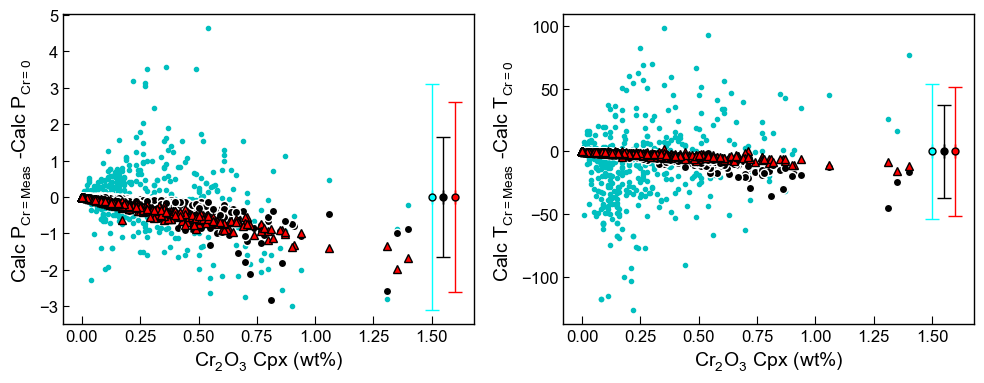

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Pet_Meas-Cr_cpx_comp_Pet_NoCr, '.c')

ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Wang21_Meas-Cr_cpx_comp_Wang21_NoCr, 'ok', mec='w')
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Put2008_Meas-Cr_cpx_comp_Put2008_NoCr, '^k', mfc='r')

ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Pet_T_Meas-Cr_cpx_comp_Pet_T_NoCr, '.c')

ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Wang21_T_Meas-Cr_cpx_comp_Wang21_T_NoCr,  'ok', mec='w')
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_cpx_comp_Put2008_T_Meas-Cr_cpx_comp_Put2008_T_NoCr, '^k', mfc='r')

## Adding error bars based on Ery's suggestion
ax1.errorbar(1.5, 0, xerr=0, yerr=3.1, fmt='o', ecolor='cyan', 
             elinewidth=1, mfc='cyan',  ms=5,
             mec='k', capsize=5, 
             label='Petrelli')
ax1.errorbar(1.55, 0, xerr=0, yerr=1.66, fmt='o', ecolor='black', 
             elinewidth=1, mfc='black',  ms=5,
             mec='k', capsize=5, 
             label='Wang')
ax1.errorbar(1.6, 0, xerr=0, yerr=2.6, fmt='o', ecolor='red', 
             elinewidth=1, mfc='red',  ms=5,
             mec='k', capsize=5, 
             label='P2008')


ax2.errorbar(1.5, 0, xerr=0, yerr=53.8, fmt='o', ecolor='cyan', 
             elinewidth=1, mfc='cyan',  ms=5,
             mec='k', capsize=5, 
             label='Petrelli')
ax2.errorbar(1.55, 0, xerr=0, yerr=36.6, fmt='o', ecolor='black', 
             elinewidth=1, mfc='black',  ms=5,
             mec='k', capsize=5, 
             label='Wang')
ax2.errorbar(1.6, 0, xerr=0, yerr=51, fmt='o', ecolor='red', 
             elinewidth=1, mfc='red',  ms=5,
             mec='k', capsize=5, 
             label='P2008')

ax1.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax2.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax1.set_ylabel('Calc P$_{Cr=Meas}$ -Calc P$_{Cr=0}$ ')
ax2.set_ylabel('Calc T$_{Cr=Meas}$ -Calc T$_{Cr=0}$ ')
plt.tight_layout()
fig.savefig('Cr_Cpx-only_points.png', dpi=200)

## Figure for text - Cpx-Liq

## Figure for Text - Cpx-Liq thermobarometry

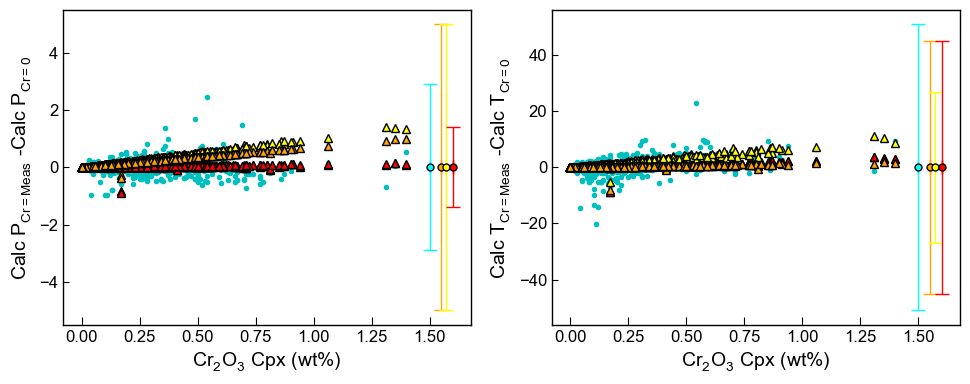

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_Pet_P_Meas-Cr_Pet_P_NoCr, '.c')

ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_31_T33_P_Meas-Cr_31_T33_P_NoCr, '^k')

ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_Neave_T33_P_Meas-Cr_Neave_T33_P_NoCr, '^k', mfc='r')
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_32c_T33_P_Meas-Cr_32c_T33_P_NoCr, '^k', mfc='yellow')
ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_32c_1996_P_Meas-Cr_32c_1996_P_NoCr, '^k', mfc='orange')

#Temp
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_Pet_T_Meas-Cr_Pet_T_NoCr, '.c')
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_31_T33_T_Meas-Cr_31_T33_T_NoCr, '^k')
#ax1.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_30_T33_P_Meas-Cr_30_T33_P_NoCr, '^c')

ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_Neave_T33_T_Meas-Cr_Neave_T33_T_NoCr, '^k', mfc='r')
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_32c_T33_T_Meas-Cr_32c_T33_T_NoCr, '^k', mfc='yellow')
ax2.plot(myCpxs1['Cr2O3_Cpx'].loc[sam], Cr_32c_1996_T_Meas-Cr_32c_1996_T_NoCr, '^k', mfc='orange')
ax1.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax2.set_xlabel('Cr$_2$O$_3$ Cpx (wt%)')
ax1.set_ylabel('Calc P$_{Cr=Meas}$ -Calc P$_{Cr=0}$ ')
ax2.set_ylabel('Calc T$_{Cr=Meas}$ -Calc T$_{Cr=0}$ ')
fig.tight_layout()

## Adding error bars based on Ery's suggestion
ax1.errorbar(1.5, 0, xerr=0, yerr=2.9, fmt='o', ecolor='cyan', 
             elinewidth=1, mfc='cyan',  ms=5,
             mec='k', capsize=5, 
             label='Petrelli')
ax1.errorbar(1.55, 0, xerr=0, yerr=5, fmt='o', ecolor='orange', 
             elinewidth=1, mfc='orange',  ms=5,
             mec='k', capsize=5, 
             label='P2008 1997 T1-eq32c')
ax1.errorbar(1.57, 0, xerr=0, yerr=5, fmt='o', ecolor='yellow', 
             elinewidth=1, mfc='yellow',  ms=5,
             mec='k', capsize=5, 
             label='P2008 1997 T1-eq32c')
ax1.errorbar(1.6, 0, xerr=0, yerr=1.4, fmt='o', ecolor='red', 
             elinewidth=1, mfc='red',  ms=5,
             mec='k', capsize=5, 
             label='P2008 eq33-NP17')


ax2.errorbar(1.5, 0, xerr=0, yerr=51, fmt='o', ecolor='cyan', 
             elinewidth=1, mfc='cyan',  ms=5,
             mec='k', capsize=5, 
             label='Petrelli')
ax2.errorbar(1.55, 0, xerr=0, yerr=45, fmt='o', ecolor='orange', 
             elinewidth=1, mfc='orange',  ms=5,
             mec='k', capsize=5, 
             label='eq33-eq32c')
ax2.errorbar(1.57, 0, xerr=0, yerr=27, fmt='o', ecolor='yellow', 
             elinewidth=1, mfc='yellow',  ms=5,
             mec='k', capsize=5, 
             label='P2008 1996 T1-eq32c')
ax2.errorbar(1.6, 0, xerr=0, yerr=45, fmt='o', ecolor='red', 
             elinewidth=1, mfc='red',  ms=5,
             mec='k', capsize=5, 
             label='P2008 eq33-NP')

fig.savefig('Cpx-Liq-Cr-variable-points.png', dpi=200)